<a href="https://colab.research.google.com/github/shubham0328-pack/Startup_Profit_Prediction/blob/main/Startup_Profit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
#loading and exploring data set
data = pd.read_csv('50_Startups.csv')
print(data.head())
print(data.info())
print(data.describe())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000

In [3]:
data = pd.get_dummies(data, drop_first=True)


In [4]:
X = data.drop('Profit', axis=1)
y = data['Profit']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
#prediction
y_pred = model.predict(X_test)


In [8]:
#evalute
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.8987266414328637
MAE: 6961.477813252376
MSE: 82010363.04430099
RMSE: 9055.957323458464


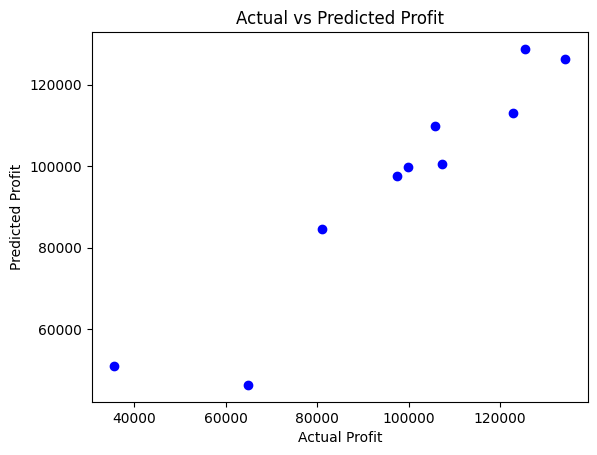

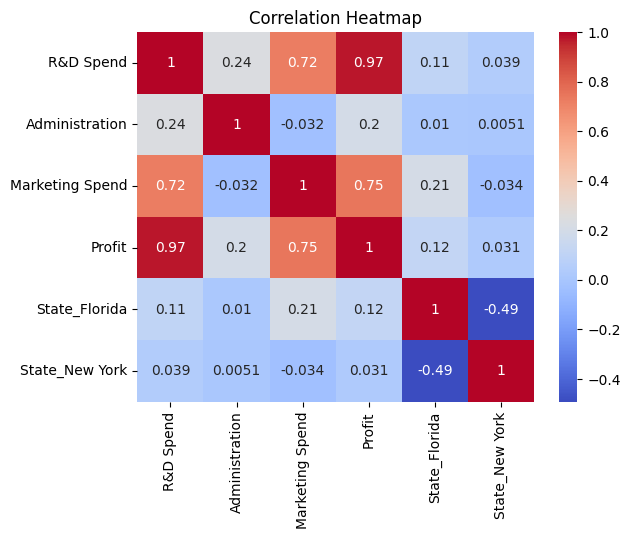

In [9]:
#visualization
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))


Linear Regression R2: 0.8987266414328637


In [12]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_lr = LinearRegression()
poly_lr.fit(X_train_p, y_train_p)
y_pred_poly = poly_lr.predict(X_test_p)

print("Polynomial Regression R2:", r2_score(y_test_p, y_pred_poly))


Polynomial Regression R2: 0.900471521600491


In [13]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree R2:", r2_score(y_test, y_pred_tree))


Decision Tree R2: 0.835899909497648


In [14]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Random Forest R2: 0.9129151597594712


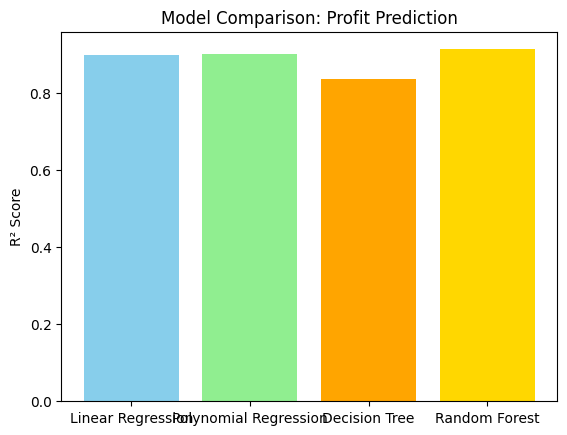

In [15]:
models = ["Linear Regression", "Polynomial Regression", "Decision Tree", "Random Forest"]
scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test_p, y_pred_poly),
    r2_score(y_test, y_pred_tree),
    r2_score(y_test, y_pred_rf)
]

plt.bar(models, scores, color=['skyblue', 'lightgreen', 'orange', 'gold'])
plt.ylabel("R² Score")
plt.title("Model Comparison: Profit Prediction")
plt.show()
